In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
# データを変数に入れる
saitama_ku = gpd.read_file('saitama_ku.geojson')

<Axes: >

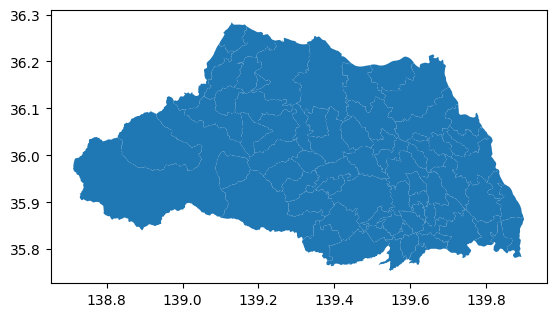

In [3]:
# とりあえずマップとしてアウトプット
saitama_ku.plot()

In [4]:
# 最初の５列は？
saitama_ku.head()

,N03_001,N03_002,N03_003,N03_004,N03_007,geometry
0,埼玉県,None,さいたま市,さいたま市西区,11101,"POLYGON ((139.54776 35.93420, 139.54720 35.934..."
1,埼玉県,None,さいたま市,さいたま市西区,11101,"POLYGON ((139.54776 35.93420, 139.54804 35.934..."
2,埼玉県,None,さいたま市,さいたま市北区,11102,"POLYGON ((139.61753 35.96486, 139.61798 35.964..."
3,埼玉県,None,さいたま市,さいたま市大宮区,11103,"POLYGON ((139.63768 35.92278, 139.63804 35.922..."
4,埼玉県,None,さいたま市,さいたま市見沼区,11104,"POLYGON ((139.66718 35.96444, 139.66739 35.964..."


In [5]:
# データの情報
saitama_ku.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   N03_001   81 non-null     object  
 1   N03_002   0 non-null      object  
 2   N03_003   38 non-null     object  
 3   N03_004   81 non-null     object  
 4   N03_007   81 non-null     object  
 5   geometry  81 non-null     geometry
dtypes: geometry(1), object(5)
memory usage: 3.9+ KB


In [8]:
saitama_pop = pd.read_csv('saitama.csv')

In [9]:
saitama_pop.head()

,KEY_CODE,HYOSYO,CITYNAME,NAME,HTKSYORI,HTKSAKI,GASSAN,人口総数,男,女,世帯総数
0,11101,1,さいたま市西区,NaN,0,NaN,NaN,93499,45843,47656,38197
1,111010010,2,さいたま市西区,宮前町,0,NaN,NaN,3327,1665,1662,1360
2,111010020,3,さいたま市西区,三橋,0,NaN,NaN,13439,6683,6756,5564
3,11101002005,4,さいたま市西区,三橋五丁目,0,NaN,NaN,3643,1806,1837,1550
4,11101002006,4,さいたま市西区,三橋六丁目,0,NaN,NaN,9796,4877,4919,4014


In [13]:
# check the new fieldname
saitama_ku

,N03_001,N03_002,N03_003,N03_004,KEY_CODE,geometry
0,埼玉県,None,さいたま市,さいたま市西区,11101,"POLYGON ((139.54776 35.93420, 139.54720 35.934..."
1,埼玉県,None,さいたま市,さいたま市西区,11101,"POLYGON ((139.54776 35.93420, 139.54804 35.934..."
2,埼玉県,None,さいたま市,さいたま市北区,11102,"POLYGON ((139.61753 35.96486, 139.61798 35.964..."
3,埼玉県,None,さいたま市,さいたま市大宮区,11103,"POLYGON ((139.63768 35.92278, 139.63804 35.922..."
4,埼玉県,None,さいたま市,さいたま市見沼区,11104,"POLYGON ((139.66718 35.96444, 139.66739 35.964..."
...,...,...,...,...,...,...
76,埼玉県,None,児玉郡,上里町,11385,"POLYGON ((139.13573 36.27844, 139.13612 36.278..."
77,埼玉県,None,大里郡,寄居町,11408,"POLYGON ((139.21746 36.16024, 139.21790 36.160..."
78,埼玉県,None,南埼玉郡,宮代町,11442,"POLYGON ((139.69974 36.05156, 139.69880 36.050..."
79,埼玉県,None,北葛飾郡,杉戸町,11464,"POLYGON ((139.70629 36.06048, 139.70637 36.060..."


In [14]:
# OBJECTからintに変える
saitama_ku['KEY_CODE'] = saitama_ku['KEY_CODE'].astype(int)

In [15]:
# checkする
saitama_ku.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   N03_001   81 non-null     object  
 1   N03_002   0 non-null      object  
 2   N03_003   38 non-null     object  
 3   N03_004   81 non-null     object  
 4   KEY_CODE  81 non-null     int32   
 5   geometry  81 non-null     geometry
dtypes: geometry(1), int32(1), object(4)
memory usage: 3.6+ KB


In [16]:
# ここでようやく merge コマンドで統合させて、新しい変数に入れる
saitama_ku_pop = saitama_ku.merge(saitama_pop,on='KEY_CODE')

In [17]:
# check!
saitama_ku_pop

,N03_001,N03_002,N03_003,N03_004,KEY_CODE,geometry,HYOSYO,CITYNAME,NAME,HTKSYORI,HTKSAKI,GASSAN,人口総数,男,女,世帯総数
0,埼玉県,None,さいたま市,さいたま市西区,11101,"POLYGON ((139.54776 35.93420, 139.54720 35.934...",1,さいたま市西区,NaN,0,NaN,NaN,93499,45843,47656,38197
1,埼玉県,None,さいたま市,さいたま市西区,11101,"POLYGON ((139.54776 35.93420, 139.54804 35.934...",1,さいたま市西区,NaN,0,NaN,NaN,93499,45843,47656,38197
2,埼玉県,None,さいたま市,さいたま市北区,11102,"POLYGON ((139.61753 35.96486, 139.61798 35.964...",1,さいたま市北区,NaN,0,NaN,NaN,149242,73370,75872,66563
3,埼玉県,None,さいたま市,さいたま市大宮区,11103,"POLYGON ((139.63768 35.92278, 139.63804 35.922...",1,さいたま市大宮区,NaN,0,NaN,NaN,117784,58338,59446,55188
4,埼玉県,None,さいたま市,さいたま市見沼区,11104,"POLYGON ((139.66718 35.96444, 139.66739 35.964...",1,さいたま市見沼区,NaN,0,NaN,NaN,165049,80749,84300,70603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,埼玉県,None,児玉郡,上里町,11385,"POLYGON ((139.13573 36.27844, 139.13612 36.278...",1,上里町,NaN,0,NaN,NaN,30343,15012,15331,11856
77,埼玉県,None,大里郡,寄居町,11408,"POLYGON ((139.21746 36.16024, 139.21790 36.160...",1,寄居町,NaN,0,NaN,NaN,32374,16053,16321,13287
78,埼玉県,None,南埼玉郡,宮代町,11442,"POLYGON ((139.69974 36.05156, 139.69880 36.050...",1,宮代町,NaN,0,NaN,NaN,34147,17182,16965,14572
79,埼玉県,None,北葛飾郡,杉戸町,11464,"POLYGON ((139.70629 36.06048, 139.70637 36.060...",1,杉戸町,NaN,0,NaN,NaN,43845,21927,21918,17706


In [18]:
saitama_ku_pop. info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   N03_001   81 non-null     object  
 1   N03_002   0 non-null      object  
 2   N03_003   38 non-null     object  
 3   N03_004   81 non-null     object  
 4   KEY_CODE  81 non-null     int32   
 5   geometry  81 non-null     geometry
 6   HYOSYO    81 non-null     int64   
 7   CITYNAME  81 non-null     object  
 8   NAME      0 non-null      object  
 9   HTKSYORI  81 non-null     int64   
 10  HTKSAKI   0 non-null      float64 
 11  GASSAN    0 non-null      float64 
 12  人口総数      81 non-null     object  
 13  男         81 non-null     object  
 14  女         81 non-null     object  
 15  世帯総数      81 non-null     object  
dtypes: float64(2), geometry(1), int32(1), int64(2), object(10)
memory usage: 9.9+ KB


In [19]:
# change from OBJECT to int
saitama_ku_pop['人口総数'] = saitama_ku_pop['人口総数'].astype(int)

In [20]:
# check
saitama_ku_pop.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   N03_001   81 non-null     object  
 1   N03_002   0 non-null      object  
 2   N03_003   38 non-null     object  
 3   N03_004   81 non-null     object  
 4   KEY_CODE  81 non-null     int32   
 5   geometry  81 non-null     geometry
 6   HYOSYO    81 non-null     int64   
 7   CITYNAME  81 non-null     object  
 8   NAME      0 non-null      object  
 9   HTKSYORI  81 non-null     int64   
 10  HTKSAKI   0 non-null      float64 
 11  GASSAN    0 non-null      float64 
 12  人口総数      81 non-null     int32   
 13  男         81 non-null     object  
 14  女         81 non-null     object  
 15  世帯総数      81 non-null     object  
dtypes: float64(2), geometry(1), int32(2), int64(2), object(9)
memory usage: 9.6+ KB


<Axes: >

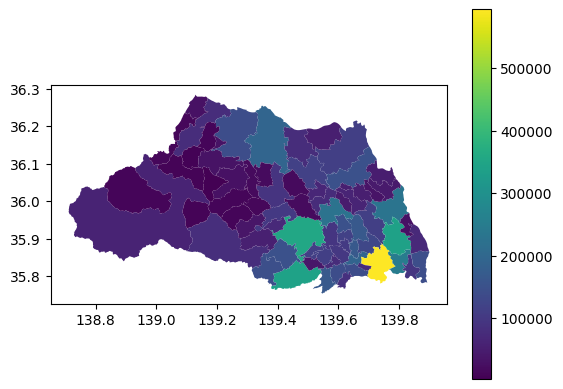

In [21]:
saitama_ku_pop.plot(column='人口総数',legend=True)

<Axes: >

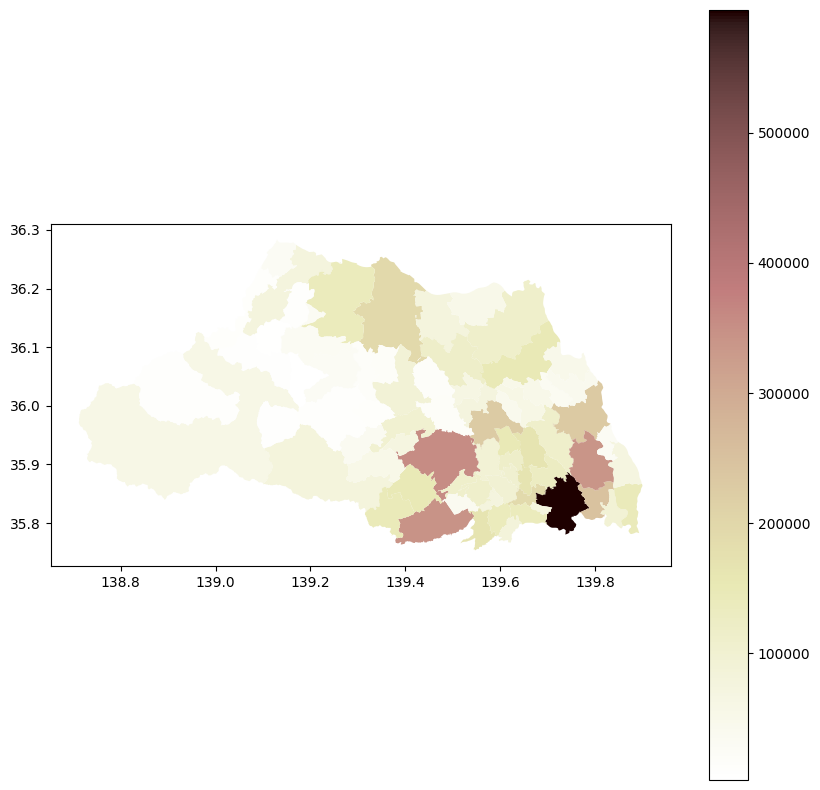

In [25]:
saitama_ku_pop.plot(figsize=(10,10),
                  column='人口総数',
                  legend=True,
                  cmap='pink_r')

## Saitama Population Map
### e-Startの統計データを元に私の地元である埼玉県の市町村別の人口総数データをマップ化してみた。図を見ると、明らかに東京に近い東部と北部に人口が集中していることがわかる。私は埼玉生まれ、埼玉育ちで、埼玉県の地理や人口密度が高い市は首都であるさいたま市や大宮、浦和市であろうと思っていたが、なんと最も人口密度が高い市は川口市だった。ネット記事によると川口市は昔から人々によって住みやすい街として有名であった。そして、現在も家族層や外国人移住者にも手厚いことから川口市は人口が最も多いとされている。その次に多いのは川越、所沢、越谷市だった。これらの市は東京にも近く、教育面や生活面でもサポートが高い市であることから人口密度の高さがわかる。一方で一番白い部分、今にも消えてしまいそうな市町村の多くは西部と南部の村や町である。過疎化が続き、若者や家族層は東や北に移動する傾向にあるのかもしれない。

##　埼玉県にはどのくらい外国人が住んでいるのだろう？

In [75]:
import geopandas as gpd
import pandas as pd

In [76]:
# データを変数に入れる
saitama_ku = gpd.read_file('saitama_ku.geojson')

<Axes: >

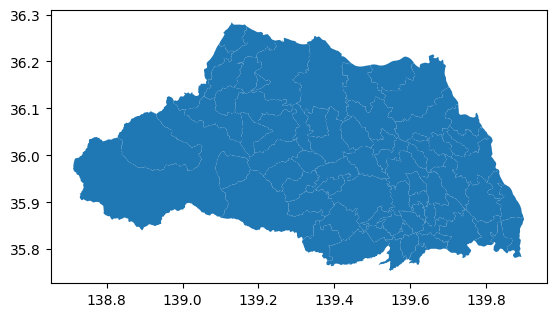

In [77]:
# とりあえずマップとしてアウトプット
saitama_ku.plot()

In [78]:
# データの情報
saitama_ku.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   N03_001   81 non-null     object  
 1   N03_002   0 non-null      object  
 2   N03_003   38 non-null     object  
 3   N03_004   81 non-null     object  
 4   N03_007   81 non-null     object  
 5   geometry  81 non-null     geometry
dtypes: geometry(1), object(5)
memory usage: 3.9+ KB


In [79]:
saitama_pop = pd.read_csv('saitama international.csv')

In [80]:
saitama_pop.head()

,KEY_CODE,CITYNAME,人口総数
0,11100,埼玉県 さいたま市,"26,705"
1,11101,埼玉県 さいたま市 西区,"1,179"
2,11102,埼玉県 さいたま市 北区,"2,499"
3,11103,埼玉県 さいたま市 大宮区,"2,888"
4,11104,埼玉県 さいたま市 見沼区,"3,111"


In [81]:
saitama_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   KEY_CODE  73 non-null     int64 
 1   CITYNAME  73 non-null     object
 2   人口総数      73 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.8+ KB


In [82]:
# rename
saitama_ku.rename(columns={'N03_007':'KEY_CODE'},inplace=True)

In [83]:
# check the new fieldnam
saitama_ku

,N03_001,N03_002,N03_003,N03_004,KEY_CODE,geometry
0,埼玉県,None,さいたま市,さいたま市西区,11101,"POLYGON ((139.54776 35.93420, 139.54720 35.934..."
1,埼玉県,None,さいたま市,さいたま市西区,11101,"POLYGON ((139.54776 35.93420, 139.54804 35.934..."
2,埼玉県,None,さいたま市,さいたま市北区,11102,"POLYGON ((139.61753 35.96486, 139.61798 35.964..."
3,埼玉県,None,さいたま市,さいたま市大宮区,11103,"POLYGON ((139.63768 35.92278, 139.63804 35.922..."
4,埼玉県,None,さいたま市,さいたま市見沼区,11104,"POLYGON ((139.66718 35.96444, 139.66739 35.964..."
...,...,...,...,...,...,...
76,埼玉県,None,児玉郡,上里町,11385,"POLYGON ((139.13573 36.27844, 139.13612 36.278..."
77,埼玉県,None,大里郡,寄居町,11408,"POLYGON ((139.21746 36.16024, 139.21790 36.160..."
78,埼玉県,None,南埼玉郡,宮代町,11442,"POLYGON ((139.69974 36.05156, 139.69880 36.050..."
79,埼玉県,None,北葛飾郡,杉戸町,11464,"POLYGON ((139.70629 36.06048, 139.70637 36.060..."


In [84]:
# OBJECTからintに変える
saitama_ku['KEY_CODE'] = saitama_ku['KEY_CODE'].astype(int)

In [85]:
# checkする
saitama_ku.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   N03_001   81 non-null     object  
 1   N03_002   0 non-null      object  
 2   N03_003   38 non-null     object  
 3   N03_004   81 non-null     object  
 4   KEY_CODE  81 non-null     int32   
 5   geometry  81 non-null     geometry
dtypes: geometry(1), int32(1), object(4)
memory usage: 3.6+ KB


In [86]:
# ここでようやく merge コマンドで統合させて、新しい変数に入れる
saitama_ku_pop = saitama_ku.merge(saitama_pop,on='KEY_CODE')

In [87]:
# check!
saitama_ku_pop

,N03_001,N03_002,N03_003,N03_004,KEY_CODE,geometry,CITYNAME,人口総数
0,埼玉県,None,さいたま市,さいたま市西区,11101,"POLYGON ((139.54776 35.93420, 139.54720 35.934...",埼玉県 さいたま市 西区,"1,179"
1,埼玉県,None,さいたま市,さいたま市西区,11101,"POLYGON ((139.54776 35.93420, 139.54804 35.934...",埼玉県 さいたま市 西区,"1,179"
2,埼玉県,None,さいたま市,さいたま市北区,11102,"POLYGON ((139.61753 35.96486, 139.61798 35.964...",埼玉県 さいたま市 北区,"2,499"
3,埼玉県,None,さいたま市,さいたま市大宮区,11103,"POLYGON ((139.63768 35.92278, 139.63804 35.922...",埼玉県 さいたま市 大宮区,"2,888"
4,埼玉県,None,さいたま市,さいたま市見沼区,11104,"POLYGON ((139.66718 35.96444, 139.66739 35.964...",埼玉県 さいたま市 見沼区,"3,111"
...,...,...,...,...,...,...,...,...
76,埼玉県,None,児玉郡,上里町,11385,"POLYGON ((139.13573 36.27844, 139.13612 36.278...",埼玉県 上里町,"1,145"
77,埼玉県,None,大里郡,寄居町,11408,"POLYGON ((139.21746 36.16024, 139.21790 36.160...",埼玉県 寄居町,571
78,埼玉県,None,南埼玉郡,宮代町,11442,"POLYGON ((139.69974 36.05156, 139.69880 36.050...",埼玉県 宮代町,447
79,埼玉県,None,北葛飾郡,杉戸町,11464,"POLYGON ((139.70629 36.06048, 139.70637 36.060...",埼玉県 杉戸町,601


In [88]:
saitama_ku_pop.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   N03_001   81 non-null     object  
 1   N03_002   0 non-null      object  
 2   N03_003   38 non-null     object  
 3   N03_004   81 non-null     object  
 4   KEY_CODE  81 non-null     int32   
 5   geometry  81 non-null     geometry
 6   CITYNAME  81 non-null     object  
 7   人口総数      81 non-null     object  
dtypes: geometry(1), int32(1), object(6)
memory usage: 4.9+ KB


In [91]:
# change from OBJECT to int
saitama_ku_pop['人口総数'] = saitama_ku_pop['人口総数'].astype(object)

In [92]:
# check
saitama_ku_pop.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   N03_001   81 non-null     object  
 1   N03_002   0 non-null      object  
 2   N03_003   38 non-null     object  
 3   N03_004   81 non-null     object  
 4   KEY_CODE  81 non-null     int32   
 5   geometry  81 non-null     geometry
 6   CITYNAME  81 non-null     object  
 7   人口総数      81 non-null     object  
dtypes: geometry(1), int32(1), object(6)
memory usage: 4.9+ KB


<Axes: >

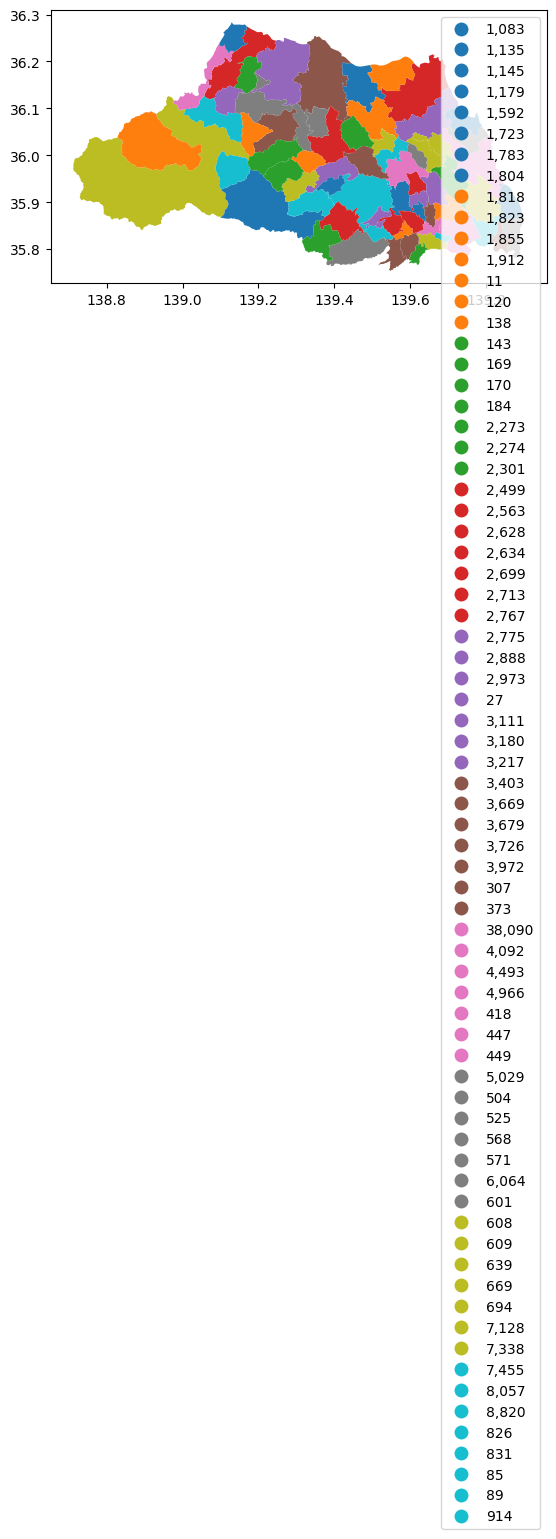

In [93]:
saitama_ku_pop.plot(column='人口総数',legend=True)

<Axes: >

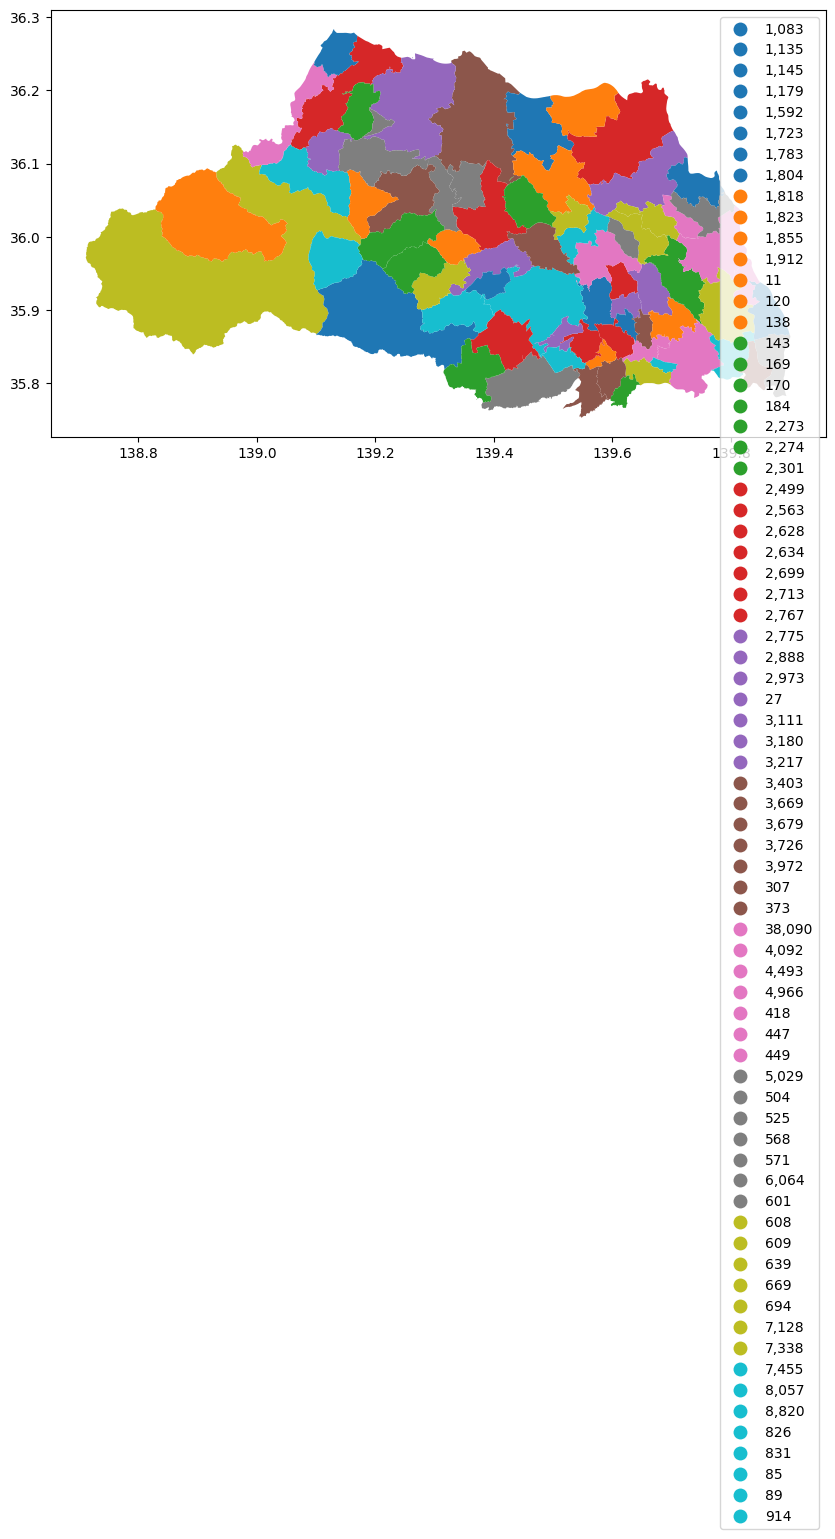

In [95]:
saitama_ku_pop.plot(figsize=(10,10),
                  column='人口総数',
                  legend=True)

<Axes: >

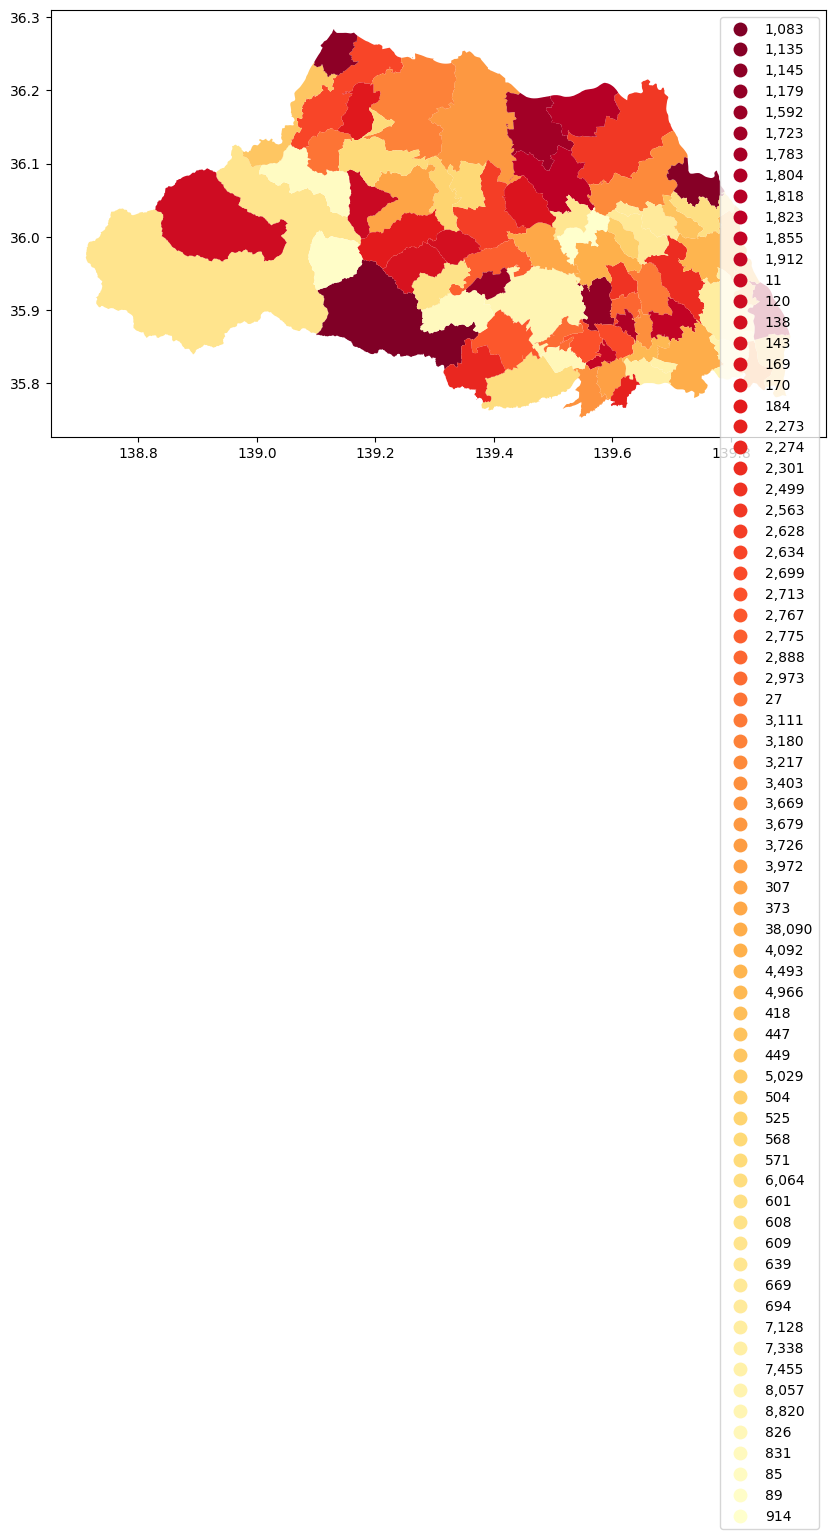

In [97]:
saitama_ku_pop.plot(figsize=(10,10),
                  column='人口総数',
                  legend=True,
                  cmap='YlOrRd_r')

## Saitama_malticultualism mapを作ってみて
###　私は三郷市に住んでいるのだが、最近三郷市や埼玉県に海外の方を多く見るようになったことから、埼玉県にはどのくらい外国人の方が住んでいるのか気になった。作ってみたのだが、国が持っている統計データと県が持っている統計データが限られているのか、pythonできれいにマップ化することができなかった。。。次回、この課題を解決できるようにクラスのみんなのマップを参考にしたり、次回学ぶレクチャーをみながらトライ＆エラーで自分の理想のマップをブラッシュアップしていきたい。